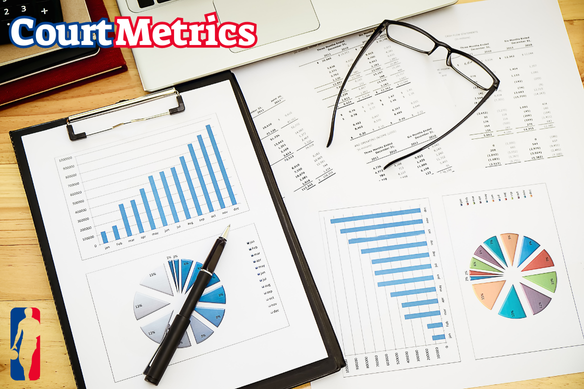

In [115]:
!pip install nba_api

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

from nba_api.stats.endpoints import commonallplayers #מאחזר רשימה של כל השחקנים בהיסטוריה כאחד
from nba_api.stats.endpoints import leaguedashteamstats #מספק סטטיסטיקות קבוצתיות, כולל נקודות, אסיסטים, ריבאונדים ומדדים אחרים עבור כל קבוצה
from nba_api.stats.endpoints import leaguedashplayerstats #מאחזר סטטיסטיקות שחקנים כגון נקודות, אסיסטים, ריבאונדים ועוד עבור כל השחקנים
from nba_api.stats.endpoints import leaguegamefinder #מוצא ומאחזר מידע משחק על סמך קריטריונים ספציפיים (למשל, קבוצה, תאריך או עונה).
from nba_api.stats.endpoints import playercareerstats #מאחזר סטטיסטיקות קריירה עבור שחקני בודדים לאורך כל היסטוריית המשחקים שלהם.
from nba_api.stats.endpoints import leaguestandings #מאחזר את דירוג הקבוצה לעונה ספציפית

In [117]:
#הגדרת הנתונים הרלוונטים על ידי המשתמש באמצעות קובץ חיצוני

#Player--
!wget -O player.txt "https://drive.google.com/uc?export=download&id=1mKQP64JWSPeCrhoYjSa8DdQPZ1jl969J"

#Team--
!wget -O team.txt "https://drive.google.com/uc?export=download&id=1wrxtAZ3MdYqsygBfdkub6HrUWY38TLk5"

#Season--
!wget -O season.txt "https://drive.google.com/uc?export=download&id=1pzYfoUmKA3TrP52k7aCm7L8Os11H1GKp"

--2024-10-25 21:44:50--  https://drive.google.com/uc?export=download&id=1mKQP64JWSPeCrhoYjSa8DdQPZ1jl969J
Resolving drive.google.com (drive.google.com)... 172.217.203.138, 172.217.203.139, 172.217.203.113, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1mKQP64JWSPeCrhoYjSa8DdQPZ1jl969J&export=download [following]
--2024-10-25 21:44:50--  https://drive.usercontent.google.com/download?id=1mKQP64JWSPeCrhoYjSa8DdQPZ1jl969J&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.134.132, 2607:f8b0:400c:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.134.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12 [application/octet-stream]
Saving to: ‘player.txt’

player.txt          100%[===================>]      12  --.-KB/s    in 0s   

In [118]:
#מבני נתונים:


#פוקנציה שמדפיסה את מבנה הנתונים שמקבלים מהאיי.פי.אי

def print_api_data_structure_players():
    players_data = commonallplayers.CommonAllPlayers(is_only_current_season=0).get_dict()
    players_headers = players_data['resultSets'][0]['headers']
    print(f'Data players Headers: {players_headers}')
    return players_headers

# פונקציה שמדפיסה את מבנה הנתונים של דירוג הקבוצות

def print_api_data_structure_standings():
    standings_data = leaguestandings.LeagueStandings().get_dict()
    standings_headers = standings_data['resultSets'][0]['headers']
    print(f'Data standings Headers: {standings_headers}')
    return standings_headers

# פונקציה שמדפיסה את מבנה הנתונים של סטטיסטיקות הקבוצות

def print_api_data_structure_team_stats():
    team_stats_data = leaguedashteamstats.LeagueDashTeamStats().get_dict()
    team_headers = team_stats_data['resultSets'][0]['headers']
    print(f'Team Stats Headers: {team_headers}')
    return team_headers


def print_api_data_structure_players_stats():
    players_stats_data = leaguedashplayerstats.LeagueDashPlayerStats().get_dict()
    players_stats_headers = players_stats_data['resultSets'][0]['headers']
    print(f'Players Stats Headers: {players_stats_headers}')

players_headers = print_api_data_structure_players()
standings_headers = print_api_data_structure_standings()
team_stats_headers = print_api_data_structure_team_stats()
players_stats_headers = print_api_data_structure_players_stats()

Data players Headers: ['PERSON_ID', 'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FIRST_LAST', 'ROSTERSTATUS', 'FROM_YEAR', 'TO_YEAR', 'PLAYERCODE', 'PLAYER_SLUG', 'TEAM_ID', 'TEAM_CITY', 'TEAM_NAME', 'TEAM_ABBREVIATION', 'TEAM_CODE', 'TEAM_SLUG', 'GAMES_PLAYED_FLAG', 'OTHERLEAGUE_EXPERIENCE_CH']
Data standings Headers: ['LeagueID', 'SeasonID', 'TeamID', 'TeamCity', 'TeamName', 'Conference', 'ConferenceRecord', 'PlayoffRank', 'ClinchIndicator', 'Division', 'DivisionRecord', 'DivisionRank', 'WINS', 'LOSSES', 'WinPCT', 'LeagueRank', 'Record', 'HOME', 'ROAD', 'L10', 'Last10Home', 'Last10Road', 'OT', 'ThreePTSOrLess', 'TenPTSOrMore', 'LongHomeStreak', 'strLongHomeStreak', 'LongRoadStreak', 'strLongRoadStreak', 'LongWinStreak', 'LongLossStreak', 'CurrentHomeStreak', 'strCurrentHomeStreak', 'CurrentRoadStreak', 'strCurrentRoadStreak', 'CurrentStreak', 'strCurrentStreak', 'ConferenceGamesBack', 'DivisionGamesBack', 'ClinchedConferenceTitle', 'ClinchedDivisionTitle', 'ClinchedPlayoffBirth', 'Eliminated

In [119]:
from nba_api.stats.endpoints import leaguestandings
import pandas as pd

def print_league_standings(season):
    # Get the standings data for the specific season
    standings_data = leaguestandings.LeagueStandings(season=season).get_dict()

    # Extract the row set and headers to form a DataFrame
    team_data = standings_data['resultSets'][0]['rowSet']
    headers = standings_data['resultSets'][0]['headers']

    # Create a DataFrame
    df_standings = pd.DataFrame(team_data, columns=headers)

    # Print the complete DataFrame
    print(df_standings)

# Call the function to print the standings data for the 2011-12 season
print_league_standings("2011-12")


   LeagueID SeasonID      TeamID       TeamCity       TeamName Conference  \
0        00    22011  1610612759    San Antonio          Spurs       West   
1        00    22011  1610612741        Chicago          Bulls       East   
2        00    22011  1610612760  Oklahoma City        Thunder       West   
3        00    22011  1610612748          Miami           Heat       East   
4        00    22011  1610612754        Indiana         Pacers       East   
5        00    22011  1610612747    Los Angeles         Lakers       West   
6        00    22011  1610612738         Boston        Celtics       East   
7        00    22011  1610612763        Memphis      Grizzlies       West   
8        00    22011  1610612737        Atlanta          Hawks       East   
9        00    22011  1610612746    Los Angeles       Clippers       West   
10       00    22011  1610612743         Denver        Nuggets       West   
11       00    22011  1610612753        Orlando          Magic       East   

In [120]:
#Players:

def get_all_players(): #מחזירה את כל השחקנים ממאגר הנתונים
 data = commonallplayers.CommonAllPlayers(is_only_current_season=0).get_data_frames()[0]
 return data

def load_user_player(file_path): #פונקציה שקוראת את שם השחקן מתוך קובץ ומחזירה אותו כטקסט
  with open('player.txt', 'rt', encoding='utf-8-sig') as file:
    players = file.readline().strip()
  return players

def load_player(players): #מחפשת את השחקן על בסיס השם מתוך המאגר
  players = commonallplayers.CommonAllPlayers(is_only_current_season=0).get_dict()['resultSets'][0]['rowSet'] #קבל נתונים לא רק על שחקנים שפעילים כרגע
  for player in players:
    if player_name.lower() in player[2].lower():
      return player[0]
  return "Player don't found"

In [121]:
# מדפיס את המספר המזהה של השחקן

player_file = 'player.txt'
player_name = load_user_player(player_file)
player_id = load_player(player_name)

print(f"Player ID for {player_name}: {player_id}")

Player ID for Lebron James: 2544


In [122]:
#Teams

def get_all_teams(): #מחזיר את כל הנתונים הסטטיסטיים של הקבוצות בעונה
  teams_data = leaguedashteamstats.LeagueDashTeamStats().get_data_frames()[0]
  return teams_data

def load_user_teams(file_path): #קוראת שם קבוצה מקובץ טקסט ומחזירה את השם כטקסט
  with open('team.txt', 'rt', encoding='utf-8-sig') as file:
    teams_names = file.readline().strip()
  return teams_names

def load_team(teams_names): #מחפש את המספר זיהוי של קבוצה מסוימת
  teams = leaguedashteamstats.LeagueDashTeamStats(season="2023-24").get_dict()['resultSets'][0]['rowSet']
  for team in teams:
    if teams_names.lower() in team[1].lower():
      return team[0]
  return "Team don't found"

In [123]:
team_file = 'team.txt'
team_name = load_user_teams(team_file)  # טען את שם הקבוצה מהקובץ
team_id = load_team(team_name)  # חפש את ה-ID של הקבוצה

print(f"Team ID for {team_name}: {team_id}")

Team ID for Chicago Bulls: 1610612741


In [124]:
#Season

def load_user_season(file_path): #קוראת השנה מהקובץ
  with open('season.txt', 'rt', encoding='utf-8-sig') as file:
    season = file.readline().strip()
  return season

def load_season_id(file_path):
  season_name = load_user_season(file_path)
  season_id = get_season_id(season_name)
  return season_id

def get_season_id(season_str):
    start_year = season_str.split('-')[0] # העונה נכתבת בפורמט '2023-24', נוציא את החלק הראשון
    season_id = f"{start_year}"
    return season_id

season = load_user_season('season.txt')
print(season)

2023-2024


In [125]:
season_file = 'season.txt'
season_id = load_season_id(season_file)

print(f"Season ID for {season_file}: {season_id}")

Season ID for season.txt: 2023


In [126]:
# הדפסה של טבלאות המחוזות על בסיס המספר של זיהוי העונה

def get_conference_teams_by_season(season_id):
    # קבלת נתוני הדירוג מהעונה המבוקשת
    standings_data = leaguestandings.LeagueStandings(season=season_id).get_dict()

    # יצירת DataFrame עבור הנתונים
    teams_data = standings_data['resultSets'][0]['rowSet']
    headers = standings_data['resultSets'][0]['headers']
    df = pd.DataFrame(teams_data, columns=headers)

    # יצירת מילונים עבור קבוצות ה-East וה-West
    east_teams = df[df['Conference'] == 'East'][['TeamID', 'TeamName', 'WINS', 'LOSSES', 'PlayoffRank']].set_index('TeamID').to_dict('index')
    west_teams = df[df['Conference'] == 'West'][['TeamID', 'TeamName', 'WINS', 'LOSSES', 'PlayoffRank']].set_index('TeamID').to_dict('index')

    return east_teams, west_teams

# קריאת נתוני העונה ויצירת המילונים עבור הקונפרנסים
east_teams_dict, west_teams_dict = get_conference_teams_by_season(season_id)

# המרה לטבלאות pandas עבור קבוצות ה-East וה-West
east_df = pd.DataFrame.from_dict(east_teams_dict, orient='index')
west_df = pd.DataFrame.from_dict(west_teams_dict, orient='index')

# הדפסת הטבלאות
print("East Conference Teams Table:")
print(east_df)

print("\nWest Conference Teams Table:")
print(west_df)


East Conference Teams Table:
             TeamName  WINS  LOSSES  PlayoffRank
1610612738    Celtics    64      18            1
1610612752     Knicks    50      32            2
1610612749      Bucks    49      33            3
1610612739  Cavaliers    48      34            4
1610612753      Magic    47      35            5
1610612754     Pacers    47      35            6
1610612755      76ers    47      35            7
1610612748       Heat    46      36            8
1610612741      Bulls    39      43            9
1610612737      Hawks    36      46           10
1610612751       Nets    32      50           11
1610612761    Raptors    25      57           12
1610612766    Hornets    21      61           13
1610612764    Wizards    15      67           14
1610612765    Pistons    14      68           15

West Conference Teams Table:
                 TeamName  WINS  LOSSES  PlayoffRank
1610612760        Thunder    57      25            1
1610612743        Nuggets    57      25            

In [127]:
# פונקציה לשליפת נתוני השחקן במהלך הקריירה

def get_filtered_player_data(player_id):
    # שליפת כל נתוני הקריירה של השחקן
    career_stats = playercareerstats.PlayerCareerStats(player_id=player_id).get_dict()

    # שליפת הנתונים והכותרות
    player_data = career_stats['resultSets'][0]['rowSet']
    headers = career_stats['resultSets'][0]['headers']

    # יצירת DataFrame מהנתונים
    df = pd.DataFrame(player_data, columns=headers)

    # סינון העמודות הרלוונטיות בלבד
    filtered_df = df[[ 'PLAYER_AGE', 'GP', 'MIN', 'REB', 'AST', 'STL', 'BLK', 'PTS']]

    return filtered_df

# שליפת הנתונים והדפסה
player_data = get_filtered_player_data(player_id)
print(f"Player Data for {player_name}:")

print(player_data)


Player Data for Lebron James:
    PLAYER_AGE  GP     MIN  REB  AST  STL  BLK   PTS
0         19.0  79  3120.0  432  465  130   58  1654
1         20.0  80  3388.0  588  577  177   52  2175
2         21.0  79  3361.0  556  521  123   66  2478
3         22.0  78  3190.0  526  470  125   55  2132
4         23.0  75  3027.0  592  539  138   81  2250
5         24.0  81  3054.0  613  587  137   93  2304
6         25.0  76  2966.0  554  651  125   77  2258
7         26.0  79  3063.0  590  554  124   50  2111
8         27.0  62  2326.0  492  387  115   50  1683
9         28.0  76  2877.0  610  551  129   67  2036
10        29.0  77  2902.0  533  488  121   26  2089
11        30.0  69  2493.0  416  511  109   49  1743
12        31.0  76  2709.0  565  514  104   49  1920
13        32.0  74  2795.0  639  646   92   44  1954
14        33.0  82  3026.0  709  747  116   71  2251
15        34.0  55  1937.0  465  454   72   33  1505
16        35.0  67  2316.0  525  684   78   36  1698
17        36.0  

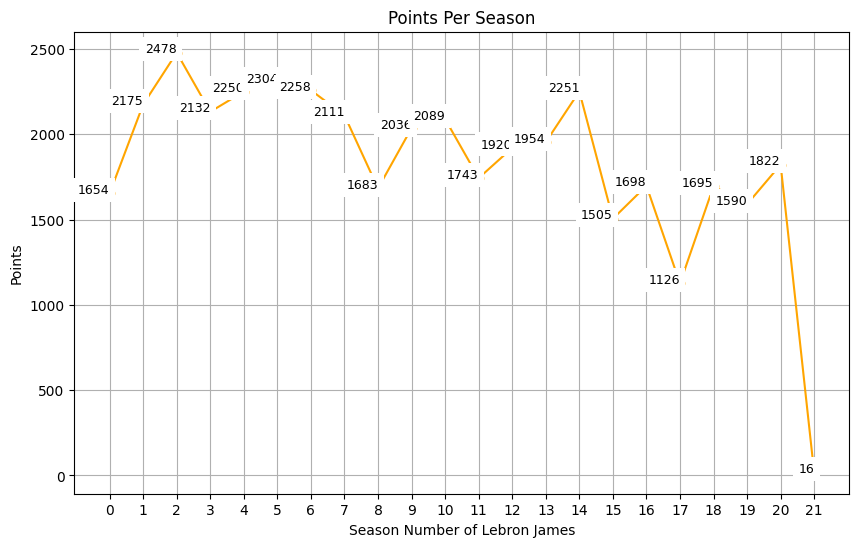

In [128]:
# גרף שמציג את מספר הנקודות של שחקן לאותה עונה

def plot_player_points_per_season(player_data):
    # Extract seasons and points
    seasons = player_data.index  # Season index based on the dataframe row number
    points = player_data['PTS']  # Points data

    # Create a line plot
    plt.figure(figsize=(10, 6))
    plt.plot(seasons, points, marker='o', linestyle='-', color='orange')  # Orange line

    # Add labels next to each point with black text and white background
    for i, point in enumerate(points):
        plt.text(seasons[i], points[i], f'{point}', fontsize=9, ha='right',
                 color='black', bbox=dict(facecolor='white', edgecolor='none'))

    # Set plot details
    plt.title('Points Per Season')
    plt.xlabel(f'Season Number of {player_name}')
    plt.ylabel('Points')
    plt.grid(True)
    plt.xticks(seasons)  # Display all season numbers
    plt.show()

# Call the function to plot
plot_player_points_per_season(player_data)


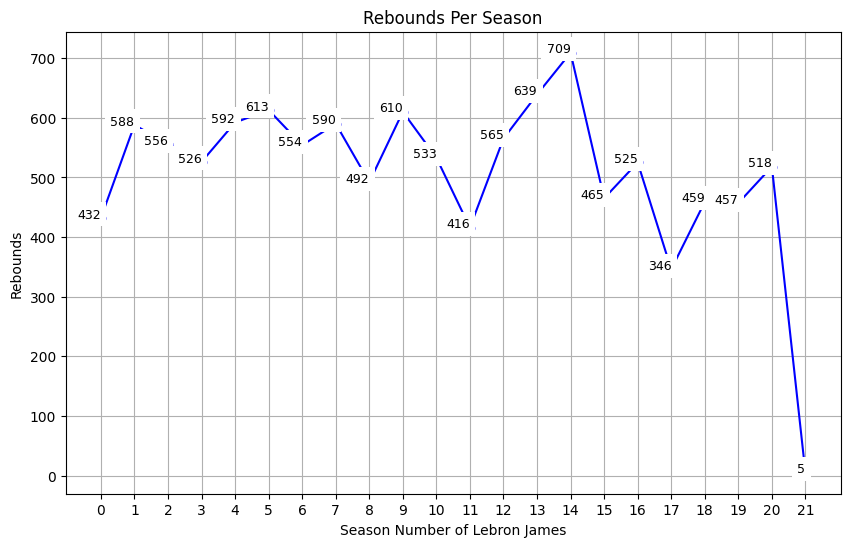

In [129]:
# גרף שמציג את מספר הריבאונדים של שחקן לאותה עונה

def plot_player_rebounds_per_season(player_data):
    # Extract seasons and rebounds
    seasons = player_data.index  # Season index based on the dataframe row number
    rebounds = player_data['REB']  # Rebounds data

    # Create a line plot
    plt.figure(figsize=(10, 6))
    plt.plot(seasons, rebounds, marker='o', linestyle='-', color='blue')  # Blue line for rebounds

    # Add labels next to each rebound point with black text and white background
    for i, rebound in enumerate(rebounds):
        plt.text(seasons[i], rebounds[i], f'{rebound}', fontsize=9, ha='right',
                 color='black', bbox=dict(facecolor='white', edgecolor='none'))

    # Set plot details
    plt.title('Rebounds Per Season')
    plt.xlabel(f'Season Number of {player_name}')
    plt.ylabel('Rebounds')
    plt.grid(True)
    plt.xticks(seasons)  # Display all season numbers
    plt.show()

# Call the function to plot
plot_player_rebounds_per_season(player_data)

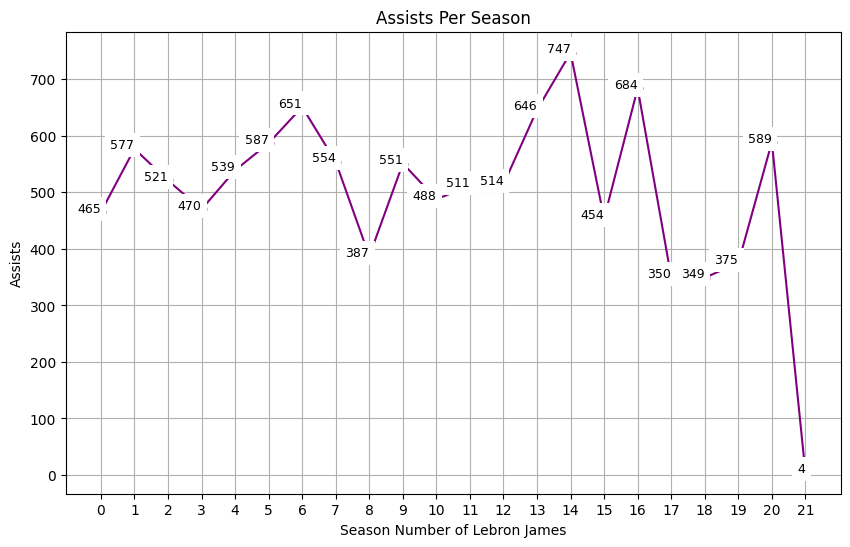

In [130]:
# גרף שמציג את מספר האסיסטים של שחקן לאותה עונה

def plot_player_assists_per_season(player_data):
    # Extract seasons and assists
    seasons = player_data.index  # Season index based on the dataframe row number
    assists = player_data['AST']  # Assists data

    # Create a line plot
    plt.figure(figsize=(10, 6))
    plt.plot(seasons, assists, marker='o', linestyle='-', color='purple')  # Purple line for assists

    # Add labels next to each assist point with black text and white background
    for i, assist in enumerate(assists):
        plt.text(seasons[i], assists[i], f'{assist}', fontsize=9, ha='right',
                 color='black', bbox=dict(facecolor='white', edgecolor='none'))

    # Set plot details
    plt.title('Assists Per Season')
    plt.xlabel(f'Season Number of {player_name}')
    plt.ylabel('Assists')
    plt.grid(True)
    plt.xticks(seasons)  # Display all season numbers
    plt.show()

# Call the function to plot
plot_player_assists_per_season(player_data)

In [131]:
#פוקנציה שמוציאה עבור הקבוצה את המיקום שלה בטבלה החל משנת 2000

def get_team_playoff_rank(team_id):
    # Define the seasons we want to fetch (you can expand or adjust this range)
    seasons = [f"{year}-{str(year+1)[-2:]}" for year in range(2000, 2024)]  # 2000-01 to 2023-24

    all_ranks = []

    # Loop through all seasons to get data
    for season in seasons:
        try:
            # Get the standings data for the specific season
            standings_data = leaguestandings.LeagueStandings(season=season).get_dict()

            # Extract the row set and headers to form a DataFrame
            team_data = standings_data['resultSets'][0]['rowSet']
            headers = standings_data['resultSets'][0]['headers']
            df_standings = pd.DataFrame(team_data, columns=headers)

            # Filter the DataFrame to find the team by TeamID
            team_row = df_standings[df_standings['TeamID'] == team_id]

            # If the team is found in this season, get its PlayoffRank
            if not team_row.empty:
                playoff_rank = team_row['PlayoffRank'].values[0]
                all_ranks.append((season, playoff_rank))
            else:
                all_ranks.append((season, None))  # If no rank, append None

        except Exception as e:
            # In case the API doesn't return data for some seasons
            all_ranks.append((season, None))
            print(f"Error fetching data for season {season}: {e}")

    # Return a DataFrame of all PlayoffRanks across seasons
    return pd.DataFrame(all_ranks, columns=['Season', 'PlayoffRank'])

team_playoff_ranks = get_team_playoff_rank(team_id)
print(team_playoff_ranks)

     Season  PlayoffRank
0   2000-01           15
1   2001-02           15
2   2002-03           12
3   2003-04           14
4   2004-05            3
5   2005-06            7
6   2006-07            5
7   2007-08           11
8   2008-09            7
9   2009-10            8
10  2010-11            1
11  2011-12            1
12  2012-13            5
13  2013-14            4
14  2014-15            3
15  2015-16            9
16  2016-17            8
17  2017-18           13
18  2018-19           13
19  2019-20           11
20  2020-21            0
21  2021-22            6
22  2022-23           10
23  2023-24            9


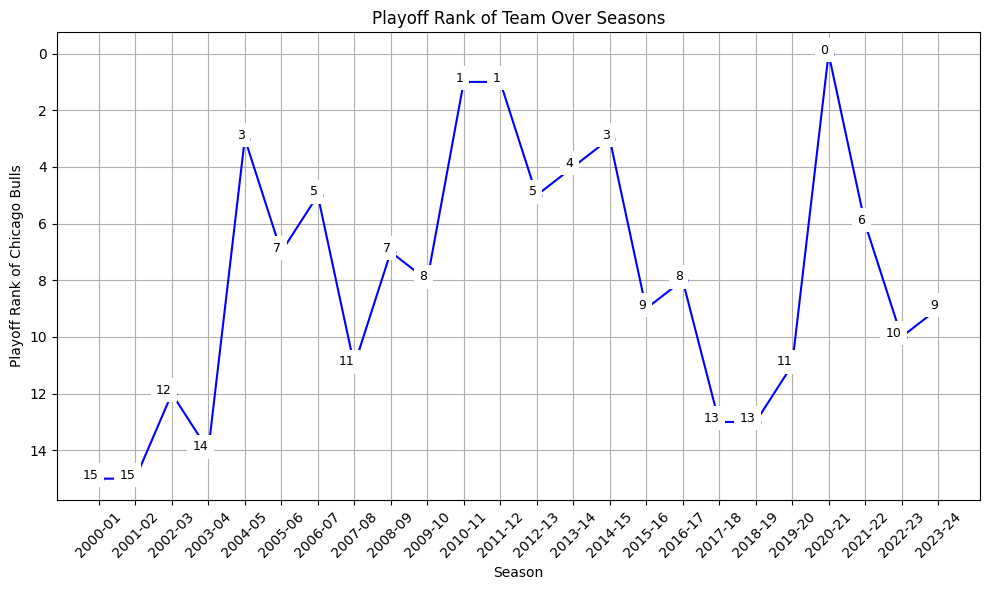

In [134]:
# גרף שמציג את מיקום הקבוצה בכל עונה

def plot_playoff_rank_from_df(team_playoff_ranks):
    # Filter out seasons with no PlayoffRank (None values)
    df_playoff_rank = team_playoff_ranks.dropna(subset=['PlayoffRank'])

    # Convert 'PlayoffRank' to integer (in case it's in float)
    df_playoff_rank['PlayoffRank'] = df_playoff_rank['PlayoffRank'].astype(int)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(df_playoff_rank['Season'], df_playoff_rank['PlayoffRank'], marker='o', linestyle='-', color='blue')

    # Add labels to the points on the plot
    for i, rank in enumerate(df_playoff_rank['PlayoffRank']):
        plt.text(df_playoff_rank['Season'].iloc[i], df_playoff_rank['PlayoffRank'].iloc[i], f'{rank}',
                 fontsize=9, ha='right', color='black', bbox=dict(facecolor='white', edgecolor='none'))

    # Set plot details
    plt.title(f"Playoff Rank of Team Over Seasons")
    plt.xlabel("Season")
    plt.ylabel(f'Playoff Rank of {team_name}')
    plt.gca().invert_yaxis()  # Invert Y-axis because rank 1 is better than rank 10
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage with the existing team_playoff_ranks DataFrame
plot_playoff_rank_from_df(team_playoff_ranks)